In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

# Load the dataset
file_path = './LEAGUE OF LEGENDS DATASET - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Define role columns
role_columns = ['TOP', 'JUNGLE', 'MID', 'BOT', 'SUPPORT']

# Create a list of transactions (each transaction is a list of champions)
transactions = data[role_columns].values.tolist()

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm with a lower min_support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Check if we have any frequent itemsets
print(frequent_itemsets)

# Filter itemsets with more than one item
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] > 1]

# Check the filtered frequent itemsets
print(frequent_itemsets)

# Plot the frequent itemsets
if not frequent_itemsets.empty:
    plt.figure(figsize=(12, 8))
    frequent_itemsets.sort_values(by='support', ascending=False).head(20).plot(
        kind='bar', x='itemsets', y='support', legend=False)
    plt.title('Top 20 Frequent Champion Synergies')
    plt.xlabel('Champion Synergies')
    plt.ylabel('Support')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No frequent itemsets found with the given min_support.")

FileNotFoundError: [Errno 2] No such file or directory: './LEAGUE OF LEGENDS DATASET - Form Responses 1.csv'

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# Load the dataset
file_path = './LEAGUE OF LEGENDS DATASET - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Define role columns
role_columns = ['TOP', 'JUNGLE', 'MID', 'BOT', 'SUPPORT']

# Create a list of transactions (each transaction is a list of champions)
transactions = data[role_columns].values.tolist()

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm with a lower min_support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Check if we have any frequent itemsets
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Calculate conviction
rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

# Calculate the length of antecedents and consequents
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x: len(x))

# Filter rules with more than one item in antecedents and consequents
if not filtered_rules.empty:
    filtered_rules.sort_values(by='lift', ascending=False).head(20).plot(
        kind='bar', x='antecedents', y='lift', legend=False)
    plt.title('Top 20 Champion Synergies by Lift')
    plt.xlabel('Champion Synergies')
    plt.ylabel('Lift')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rules found with the given conditions.")
plt.show()


     support           itemsets
0   0.078947             (Ahri)
1   0.078947         (Aphelios)
2   0.105263             (Ashe)
3   0.052632          (Caitlyn)
4   0.052632          (Camille)
5   0.052632           (Darius)
6   0.052632          (Evelynn)
7   0.065789           (Ezreal)
8   0.092105            (Fiora)
9   0.052632            (Garen)
10  0.065789           (Graves)
11  0.105263          (Hecarim)
12  0.052632        (Jarvan IV)
13  0.052632              (Jax)
14  0.105263             (Jhin)
15  0.092105           (Kai'Sa)
16  0.065789             (Kayn)
17  0.052632          (Kha'Zix)
18  0.065789          (LeBlanc)
19  0.131579          (Lee Sin)
20  0.105263            (Leona)
21  0.052632             (Lulu)
22  0.052632              (Lux)
23  0.078947         (Malphite)
24  0.065789          (Morgana)
25  0.105263         (Nautilus)
26  0.052632             (Nunu)
27  0.105263             (Pyke)
28  0.065789             (Rell)
29  0.065789         (Renekton)
30  0.05

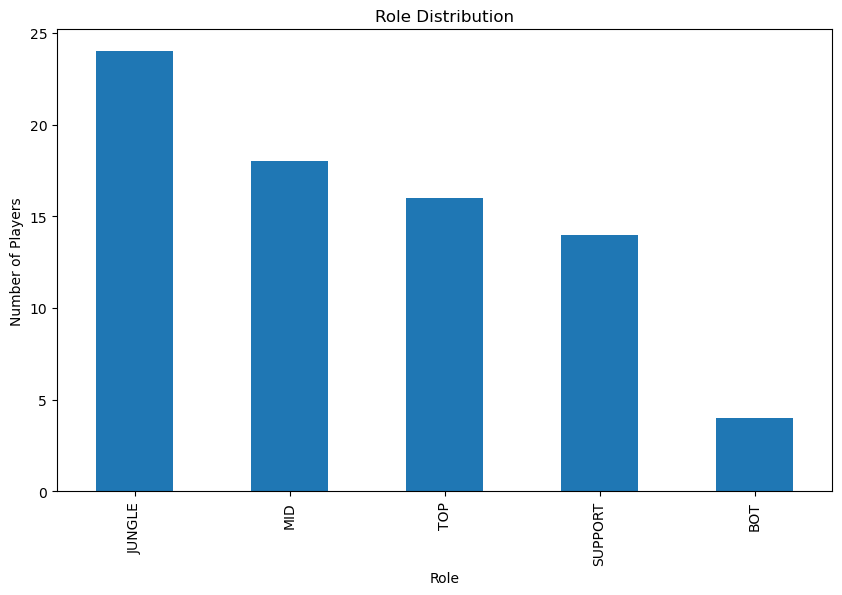

In [21]:
import matplotlib.pyplot as plt

# Role Distribution
role_distribution = data['PREFERRED ROLE'].value_counts()
role_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Role Distribution')
plt.xlabel('Role')
plt.ylabel('Number of Players')
plt.show()


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


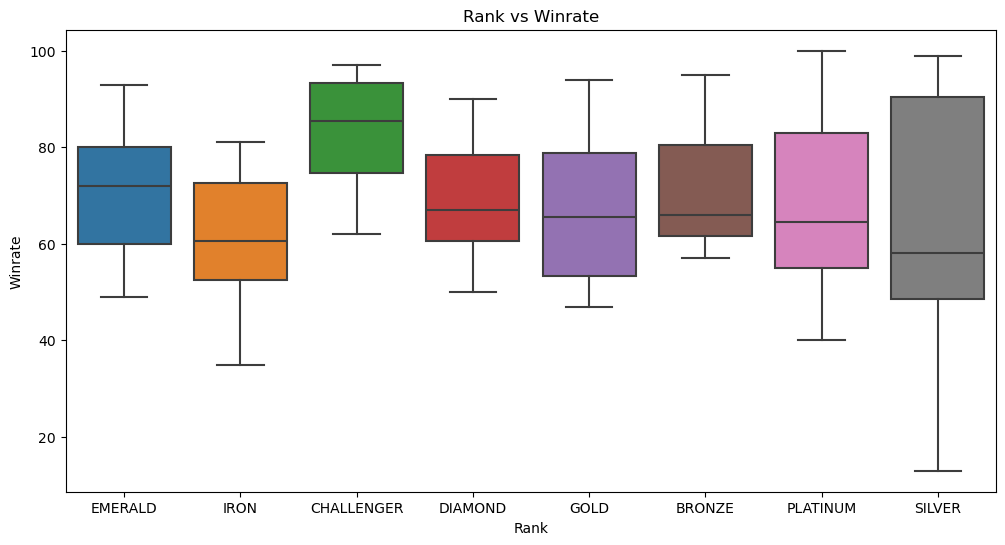

In [12]:
import seaborn as sns

# Rank vs Winrate
plt.figure(figsize=(12, 6))
sns.boxplot(x='CURRENT RANK', y='WINRATE', data=data)
plt.title('Rank vs Winrate')
plt.xlabel('Rank')
plt.ylabel('Winrate')
plt.show()


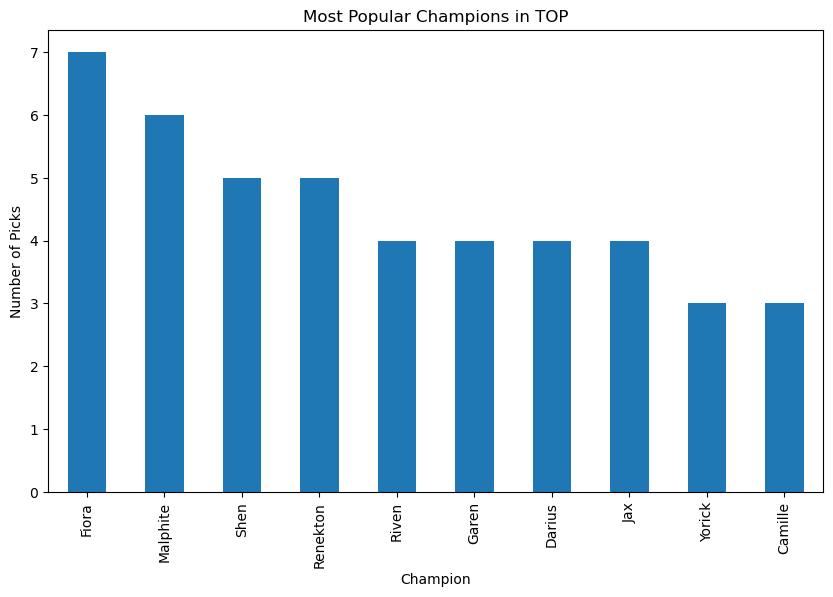

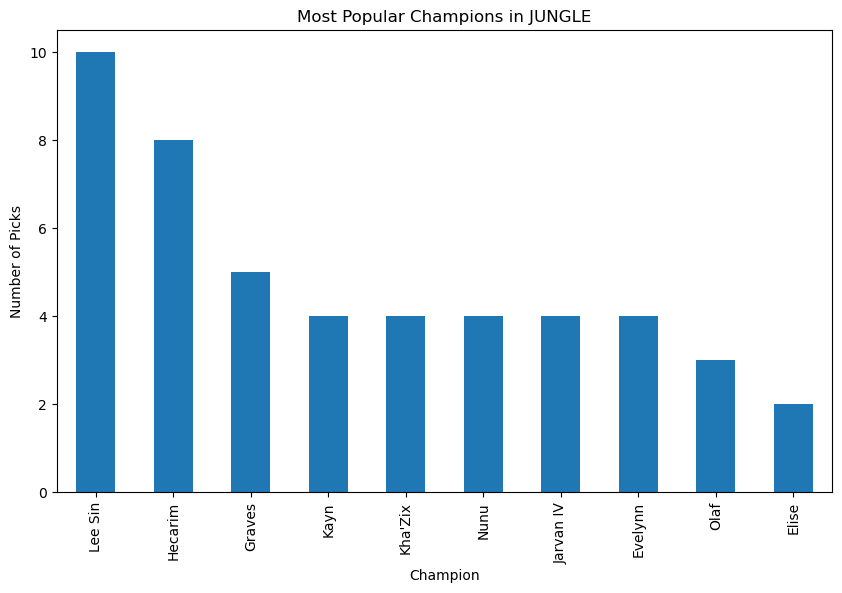

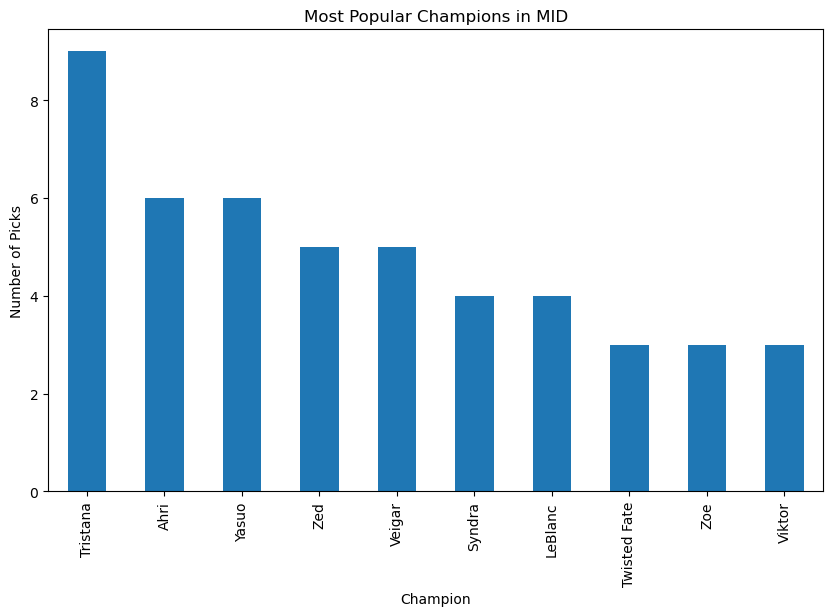

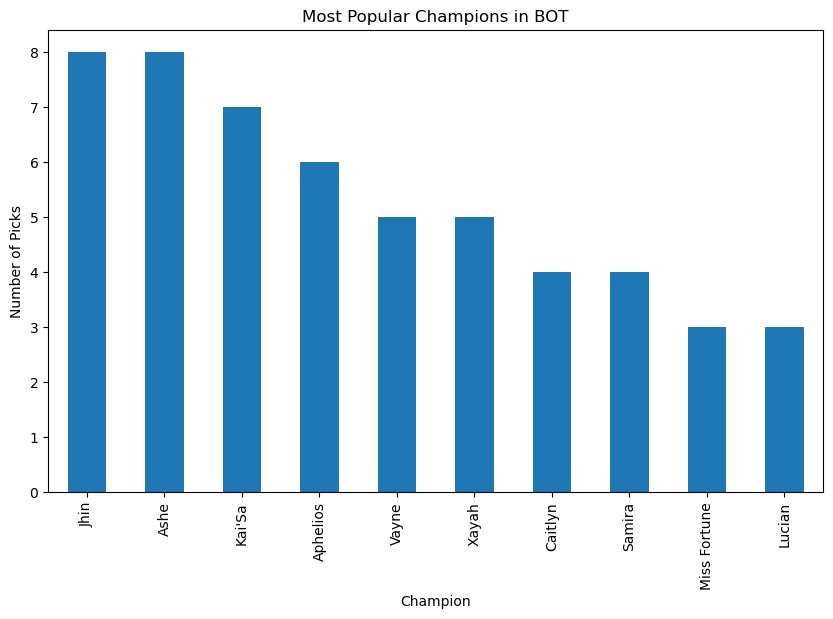

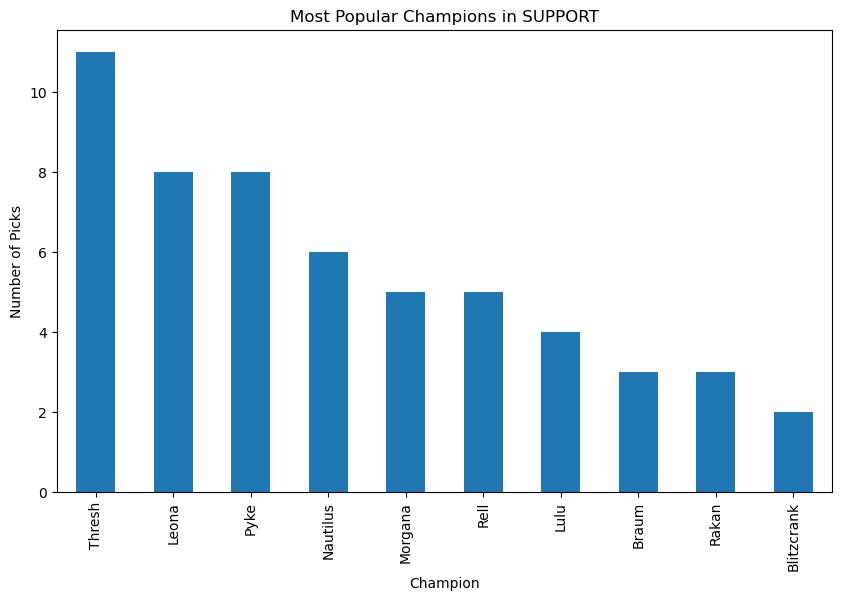

In [13]:
# Champion Popularity
role_columns = ['TOP', 'JUNGLE', 'MID', 'BOT', 'SUPPORT']
for role in role_columns:
    champion_popularity = data[role].value_counts().head(10)
    champion_popularity.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Most Popular Champions in {role}')
    plt.xlabel('Champion')
    plt.ylabel('Number of Picks')
    plt.show()


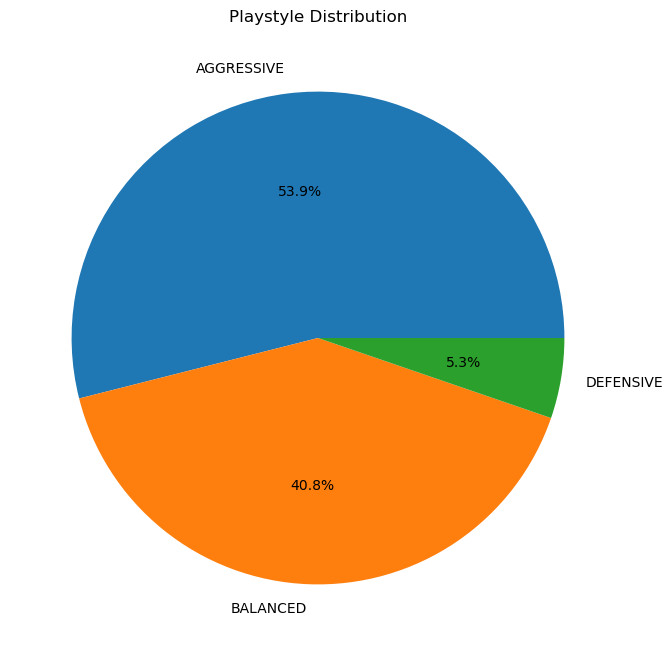

In [14]:
# Playstyle Distribution
playstyle_distribution = data['PLAYSTYLE'].value_counts()
playstyle_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Playstyle Distribution')
plt.ylabel('')
plt.show()


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

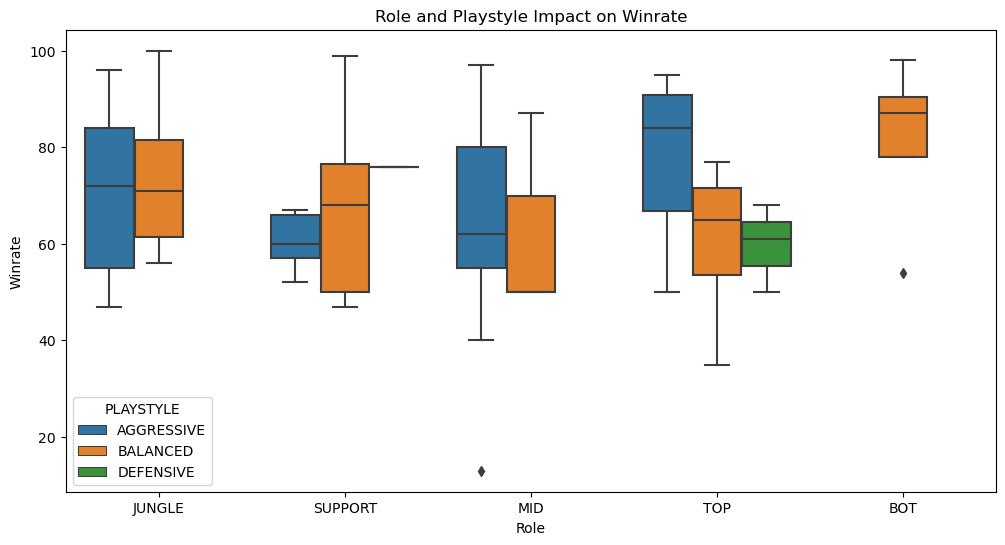

In [15]:
# Role and Playstyle Impact on Winrate
plt.figure(figsize=(12, 6))
sns.boxplot(x='PREFERRED ROLE', y='WINRATE', hue='PLAYSTYLE', data=data)
plt.title('Role and Playstyle Impact on Winrate')
plt.xlabel('Role')
plt.ylabel('Winrate')
plt.show()


In [20]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Create a list of transactions (each transaction is a list of champions)
transactions = data[role_columns].values.tolist()

# Encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm with a lower min_support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules with more than one item in antecedents
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
if not filtered_rules.empty:
    filtered_rules.sort_values(by='lift', ascending=False).head(20).plot(
        kind='bar', x='antecedents', y='lift', legend=False)
    plt.title('Top 20 Champion Synergies by Lift')
    plt.xlabel('Champion Synergies')
    plt.ylabel('Lift')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No rules found with the given conditions.")


No rules found with the given conditions.


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

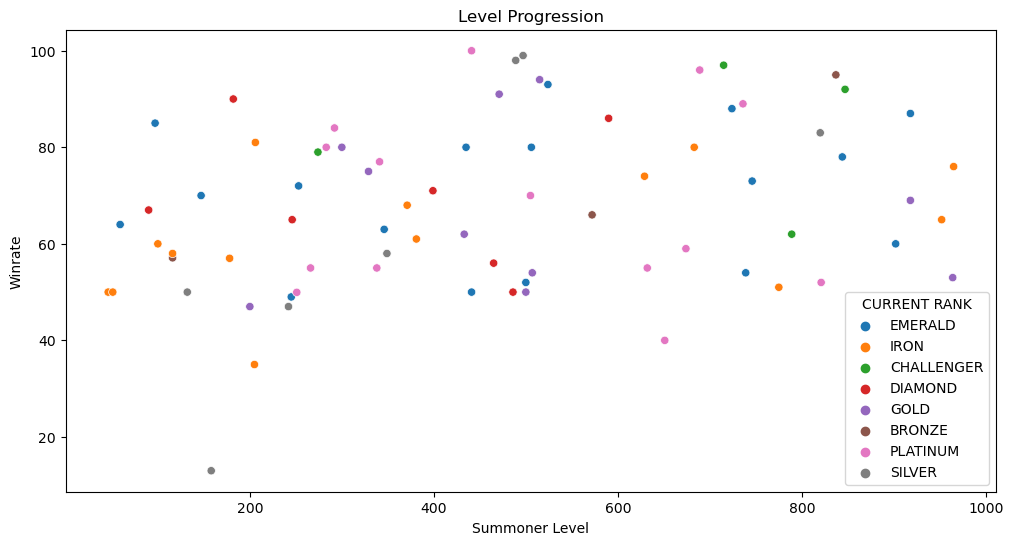

In [17]:
# Level Progression
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SUMMONER LEVEL', y='WINRATE', hue='CURRENT RANK', data=data)
plt.title('Level Progression')
plt.xlabel('Summoner Level')
plt.ylabel('Winrate')
plt.show()


e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


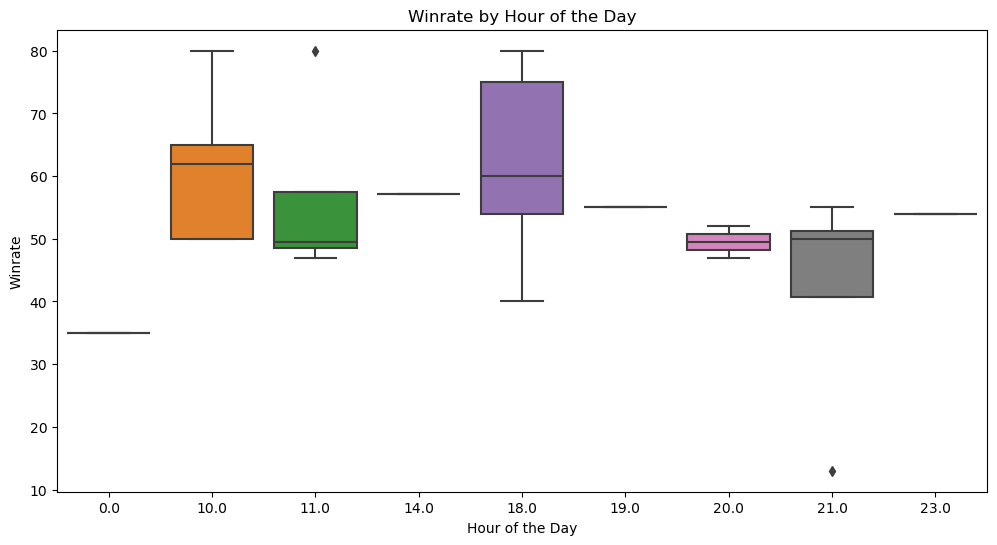

In [22]:
# Convert Timestamp to datetime and extract hour
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

# Time-based Trends
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='WINRATE', data=data)
plt.title('Winrate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Winrate')
plt.show()
